# Student marks

En este archivo se analiza el [Student Marks Dataset](https://www.kaggle.com/datasets/yasserh/student-marks-dataset) disponible en Kaggle, publicado por Ing. M Yasser H. 

El dataset que se analizará cuenta con 3 columnas.
* number_courses: Número de cursos en los que el alumno en cuestión está enscrito actualmente. Consta de un número entero.
* time_study: Número de horas en promedio que el alumno dedica durante un día al estudio. Consta de un valor de punto flotante.
* Marks: Calificación obtenida por el alumno. Consta de un valor de punto flotante.

En este documento, se pretende hacer un análisis de las variables relevantes para la predicción de las calificaciones del estudiante, con la finalidad de implementar un modelo de regresión lineal y polinomial haciendo uso de la librería de scikit-learn. También se busca comparar el desempeño de los modelos producto de la librería con los implementados de manera manual en el entregable pasado, también disponibles en este repositorio.

Ya que la intención de este documento es practicar la implementación de metodos de ML utilizando librerías, no se ha modificado el análisis de variables o aquellas que se consideran más aptas para el entrenamiento del modelo, por lo que estas ecciones han experimentado pocos cambios.

## Préambulo
### Importación de librerías

In [11]:
# Librerías de uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Librerías para analisis de datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Lectura del archivo csv

In [12]:
df = pd.read_csv('Student_Marks.csv')

### Exploración de datos

A continuación se presenta una exploración básica de los datos. Esto incluye el número de registros en el dataset, metricas estadisticas de los mismos, y gráficas que nos ayudan a comprender el comportamiento de los datos.

In [13]:
print("Numero de registros: ", len(df.index))

Numero de registros:  100


In [14]:
df.describe()   

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


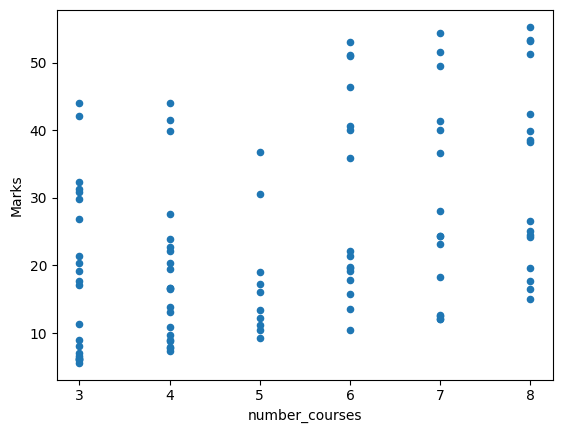

In [15]:
# Graficar el df como scatter plot
df.plot(x='number_courses', y='Marks', kind='scatter')  
plt.show()

En esta gráfica, se muestra el número de cursos contra las calificaciones del alumno. No es posible apreciar una coorrelacón fuerte entre estos datos, además de una leve dentencia hacia una mayor calificación dado un mayor número de cursos, pero no la suficiente como para considerar apropiada la inclusión de esta variable en el análisis.

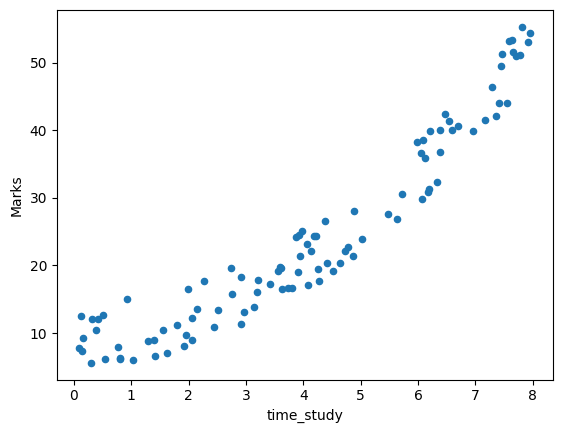

In [16]:
# Graficar el 'time_study' como scatter plot
df.plot(x='time_study', y='Marks', kind='scatter')  
plt.show()

A diferencia de el número de cursos, el tiempo de estudio parece estar fuertemente relacionado con las calificaciones del estudiante. Parece apreciarse una relación lineal, por lo que a continuación se aplicará un algoritmo de regresión lineal con la finalidad de generar un modelo que se ajuste al comportamiento de los datos.

### Partición de los datos

Se divide el conjunto de datos en dos subconjuntos para el entrenamiento y prueba de los modelos generados. Con la finalidad de ser equitativo en las pruebas, se emplean los mismos conjuntos de datos para el entrenamiento y prueba de ambos modelos.

In [17]:
time_study = np.array(df["time_study"])
marks = np.array(df["Marks"])

train_features, test_features, train_targets, test_targets = train_test_split(time_study, marks, test_size = 0.20, random_state = 42)
train_features = train_features.reshape(-1, 1)
test_features = test_features.reshape(-1, 1)

## Regresión lineal

La librería scikit-learn implementa la regresión lineal por el metodo de minimos cuadrados. Esta tecnica de regresión lineal consiste en minimizar el cuadrado de los residuos de una función, siendo los residuos la diferencia entre los datos y la predicción del modelo, esto se hace asumiendo una relación lineal entre las variables objetivo ($Y$) y variables independientes ($X$). 

La formula que se utiliza para realizar esta estimación es la siguiente:

$\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}$

$\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}$

Donde:
* $\hat{\beta}_1$: Coeficiente para la variable independiente.
* $\hat{\beta}_0$: Intersección del modelo.
* $X_i$: Valor de $x$ en la $i$-esima iteración.
* $\bar{X}$: Media de los valores de $x$.
* $Y_i$: Valor de $y$ en la $i$-esima iteración.
* $\bar{Y}$: Media de los valores de $y$.

Este proceso nos deja con un modelo lineal con la siguiente apariencia:

$y = \beta_0 + \beta_1 x_1$

Scikit-learn implementa este proceso con la clase ```LinearRegression```, la cual puede ser entrenada con el método, ```fit()```. A continuación se realiza este entrenamiento.


In [18]:
# Create a LinearRegression model
linear_model = LinearRegression().fit(train_features, train_targets)

Una vez entrenado el modelo, se realizan predicciones sobre el conjunto de pruebas, con la finalidad de calcular la metrica de desempeño *MSE*, o error cuadrático medio. La cual se puede calcular de la siguiente forma:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Afortunadamente, scikit-learn ya incluye una implementación de este algoritmo.

In [19]:
linear_predictions_test = linear_model.predict(test_features)
linear_predictions_train = linear_model.predict(train_features)

linear_model_mse_test = mean_squared_error(test_targets, linear_predictions_test)
linear_model_mse_train = mean_squared_error(train_targets, linear_predictions_train)


print("MSE subconjunto de entrenamiento: ", linear_model_mse_train)
print("MSE subconjunto de prueba: ", linear_model_mse_test)

MSE subconjunto de entrenamiento:  22.957504476389232
MSE subconjunto de prueba:  25.23674562363223


El *MSE* de esta función resultó ser de 25.24, sobre el conjunto de prueba, una mejora considerable sobre el *MSE* de 27.73 obtenido con la implementación de regresión linear utilizando desenso del gradiente de la entrega pasada.

Este valor resulta ligeramente superior al *MSE* de 22.96, lo cual es de esperarse ya que los modelos se suelen ajustar al conjunto de entrenamiento, en lugar de los datos más generalizados del conjunto de pruebas.

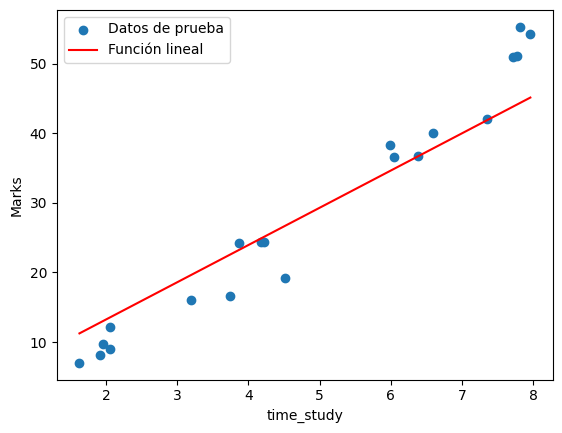

In [20]:
# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba')

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(test_features.min(), test_features.max(), 100)

# Grafica la prediccoón como una linea
plt.plot(x_values, linear_model.predict(x_values.reshape(-1, 1)), color='red', label='Función lineal')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()


Si bien me parece satisfactoria la aproximación que se logró mediante la regresión lineal, la graficación de la misma resalta el hecho de que puede no ser el modelo más apropiado para este conjunto de datos. El modelo se queda corto en los extremos y sobreestima alrededor del centro, esto me lleva a pensar que una regresión polinomial podría ser más efectiva para describir el comportamiento de este conjunto de datos.

## Regresión polinomial

La regresión linear en scikit-learn me parece bastante interesante, ya que en realidad no estamos hablando de un método cómo tal que obtiene directamente un modelo de orden mayor a 1 como minimos cuadrados, sino que consiste en generar una matriz en la que los datos de entrada se encuentrna elevados a la potencia requerida por el modelo, y de este modo se entrena un modelo ajustado a las necesidades del problema. 

A continuación se encuentra el código para implementar estas tarnsofmraciones.

In [21]:
poly_transform = PolynomialFeatures(degree=2)
poly_train_features = poly_transform.fit_transform(train_features)
poly_test_features = poly_transform.transform(test_features)

Ahora podemos entrenar un modelo regresión lineal ajustado a estos parametros, que nos regresará un modelo de regresión polinomial, con la nota de que es importante transoformar los datos a predecir antes de introducirlos en el modelo.

In [22]:
poly_model = LinearRegression()

# Fit the model on the polynomial features training data
poly_model.fit(poly_train_features, train_targets)

poly_predictions = poly_model.predict(poly_test_features)
poly_predictions_train = poly_model.predict(poly_train_features)

poly_model_test_mse = mean_squared_error(test_targets, poly_predictions)
poly_model_train_mse = mean_squared_error(train_targets, poly_predictions_train)

print("MSE subconjunto de prueba: ", poly_model_test_mse)
print("MSE subconjunto de entrenamiento: ", poly_model_train_mse)


MSE subconjunto de prueba:  8.333458440360832
MSE subconjunto de entrenamiento:  9.145289506874864


Una vez realizadas las pruebas sobre el modelo, observamos que este presenta un *MSE* de 8.34, lo cual es una mejora sutil ante el *MSE* de 8.95 obtenido con la implementación de regresión polinomial con descenso del gradiente.

En este caso el *MSE* del conjunto de prueba resultó ser menor al del conjunto de entrenamiento, algo menos común que el caso contrario, pero razonable al tratarse de una diferencia relativamente pequeña.

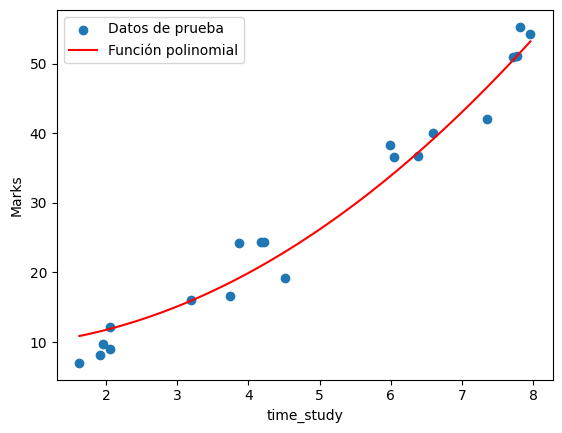

In [23]:
# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba')

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(test_features.min(), test_features.max(), 100)

# Grafica la prediccoón como una linea
plt.plot(x_values, poly_model.predict(poly_transform.transform(x_values.reshape(-1, 1))), color='red', label='Función polinomial')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()

De nuevo, podemos apreciar como este modelo se ajusta de manera mmucho más satisfactoria a los datos que la regresión lineal; siendo aún mejor que la implementación anterior no solo en metricas de rendimiento (*MSE* = 8.34 < *MSE* de 8.95), sino que se consiguió una implemntación mucho más limpia en código, estandarizada, y fácilmente comprensible para toda persona que haya trabajado con esta librería con anterioridad.